# Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling

In [2]:
df=pd.read_csv('KaggleV2-May-2016.csv')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
29280,7.275624e+12,5663341,M,2016-05-05T09:52:20Z,2016-05-05T00:00:00Z,1,ROMÃO,0,0,0,0,0,0,No
68118,1.398432e+13,5568648,F,2016-04-11T15:00:01Z,2016-05-13T00:00:00Z,24,ANDORINHAS,0,0,0,0,0,0,No
39307,2.886524e+11,5705470,F,2016-05-17T07:13:33Z,2016-05-20T00:00:00Z,65,SANTA MARTHA,0,1,1,0,0,0,No
43945,7.542513e+14,5623083,M,2016-04-26T13:32:19Z,2016-05-06T00:00:00Z,7,HORTO,0,0,0,0,0,1,Yes
34003,3.324475e+13,5656187,F,2016-05-04T07:44:04Z,2016-05-04T00:00:00Z,46,SÃO BENEDITO,1,0,0,0,1,0,No


## Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing value

In [5]:
df.shape

(110527, 14)

Data consist of 110527 Appointment and 14 columns

In [6]:
df.duplicated().sum()

0

there is no duplication in the rows

In [7]:
df['PatientId'].nunique()

62299

only 62299 out of 110527 are unique patients ID

In [8]:
df['PatientId'].duplicated().sum()

48228

There is 48228 duplicated ID

In [9]:
df[['PatientId','No-show']].duplicated().sum()

38710

There are 38710 patients have the status of showing or no

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age is 37, max age is 115, and the min age is -1 and that is mistake in data(will be removed), about 50% of ages are between 18 to 55 years, about 25 % of patients are received SMS

In [11]:
mask=df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data cleaning

In [12]:
df.drop(index=99832,inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#removing duplicated IDs with duplicated showing status
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71816, 14)

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#rempving unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [17]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Exploratory Data Analysis(EDA)
Analyzing and visualizing data sets to extract meaningful insights and patterns

## Overview 

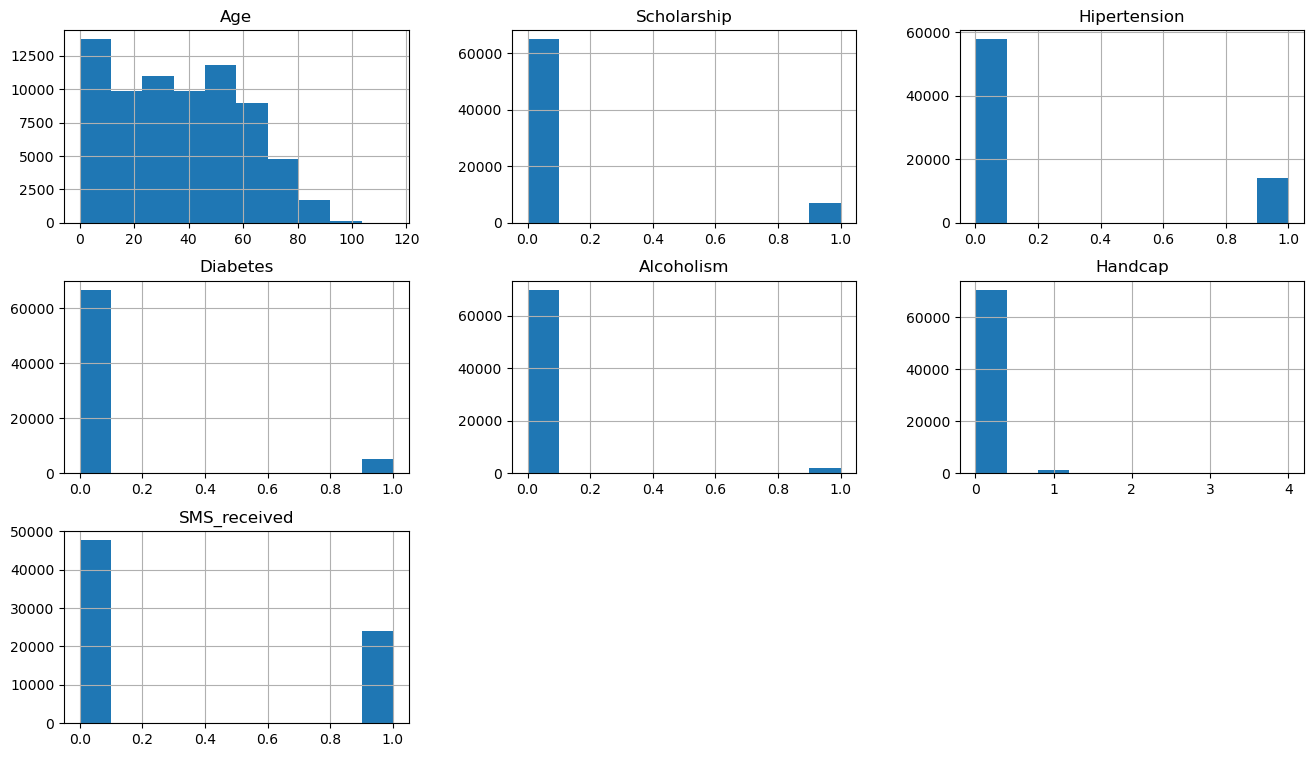

In [18]:
df.hist(figsize=(16,9))
plt.show()

In [19]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
#dividing the patients to 2 groups according to showing or no
show=df['No-show']=='No'
Noshow=df['No-show']=='Yes'
print('The patients who showing are ',len(df[show]))
print('The patients who no showing are ',len(df[Noshow]))

The patients who showing are  54153
The patients who no showing are  17663


In [21]:
df[show].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,54153.000000,54153.000000,54153.000000,54153.000000,54153.0000,54153.000000,54153.000000
mean,37.229166,0.091334,0.202944,0.072868,0.0236,0.020904,0.297232
std,23.710145,0.288086,0.402195,0.259921,0.1518,0.157326,0.457044
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.0000,4.000000,1.000000


In [22]:
df[Noshow].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000,17663.000000
mean,34.376267,0.108419,0.170922,0.065108,0.029440,0.017777,0.453094
std,22.192819,0.310917,0.376452,0.246723,0.169041,0.149058,0.497809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean age of showed patients is 37
The mean age of no Showed patients is 34
patients are no showed receiving SMS more than patients are showed

#### How is Scolarship affect attendance?

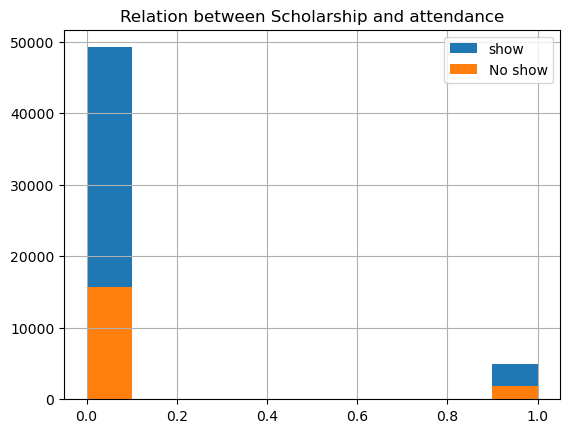

In [23]:
df[show]['Scholarship'].hist(label='show')
df[Noshow]['Scholarship'].hist(label='No show')
plt.title('Relation between Scholarship and attendance')
plt.legend()
plt.show()

The Scholarship is no effect on attendance

#### How is Alcoholism affect attendance?

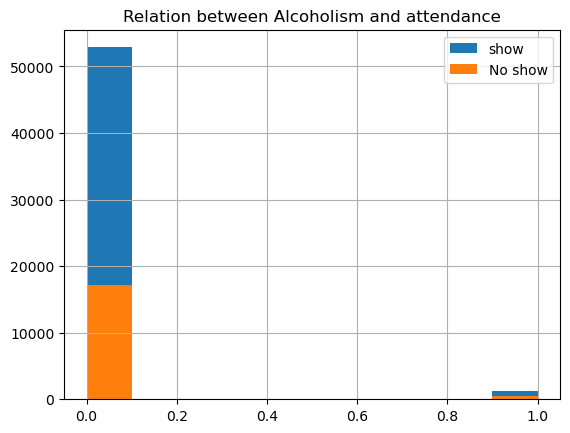

In [24]:
df[show]['Alcoholism'].hist(label='show')
df[Noshow]['Alcoholism'].hist(label='No show')
plt.title('Relation between Alcoholism and attendance')
plt.legend()
plt.show()

The Alcoholism is no effect on attendance

#### How is Handcap affect attendance?

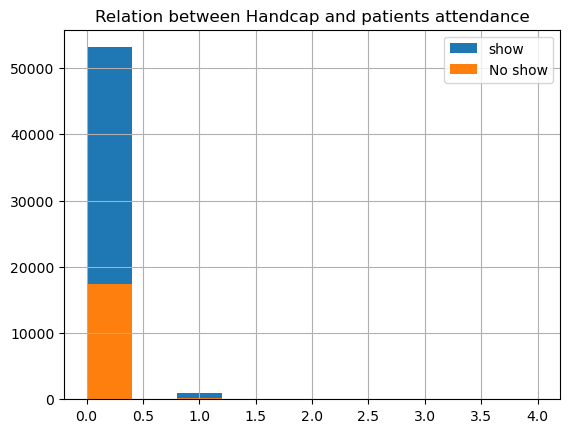

In [25]:
df[show]['Handcap'].hist(label='show')
df[Noshow]['Handcap'].hist(label='No show')
plt.title('Relation between Handcap and patients attendance')
plt.legend()
plt.show()

The Handcap is effect on attendance

#### How is receiving SMS effective on attendance?

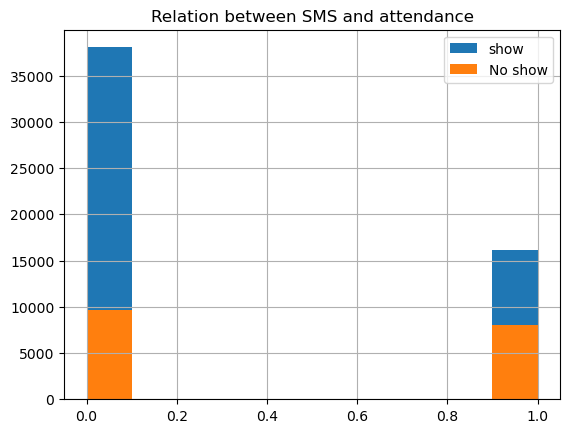

In [26]:
df[show]['SMS_received'].hist(label='show')
df[Noshow]['SMS_received'].hist(label='No show')
plt.title('Relation between SMS and attendance')
plt.legend()
plt.show()

Number of showing patients without receiving SMS greater than showing patients that have SMS

#### How is gender affect attendance?

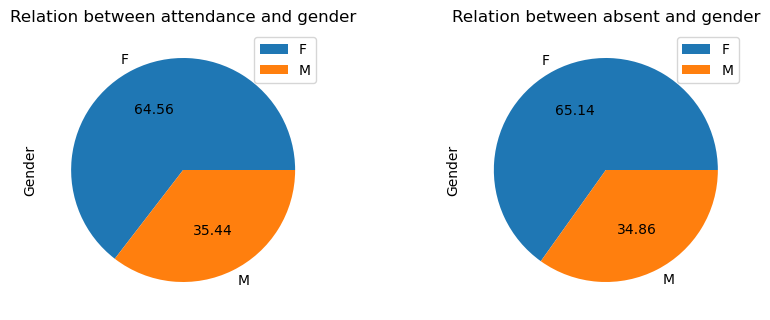

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df[show]['Gender'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title('Relation between attendance and gender')
plt.legend()
plt.subplot(2,2,2)
df[Noshow]['Gender'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title('Relation between absent and gender')
plt.legend()
plt.show()

The females are the most in both statuses so the gender is no effect on attendance

#### How does age effect on the attendance

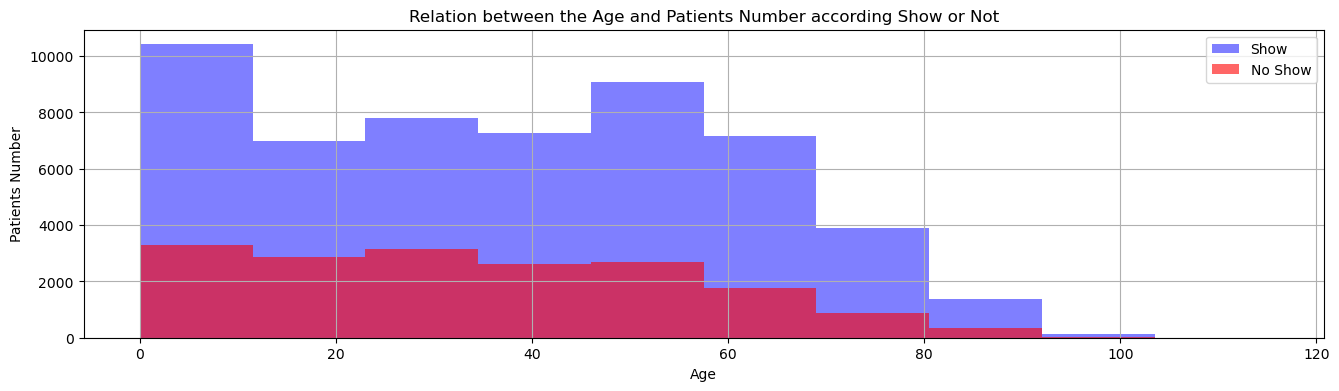

In [28]:
plt.figure(figsize=(16,4))
df['Age'][show].hist(color='blue',alpha=.5,label='Show')
df['Age'][Noshow].hist(color='red',alpha=.6,label='No Show')
plt.legend()
plt.title('Relation between the Age and Patients Number according Show or Not')
plt.xlabel('Age')
plt.ylabel('Patients Number')
plt.show()

The patients with age from 0 to 10 are the most showing (kids), the least attended are have age above 70

#### Is Neighbourhood affect the attendance?

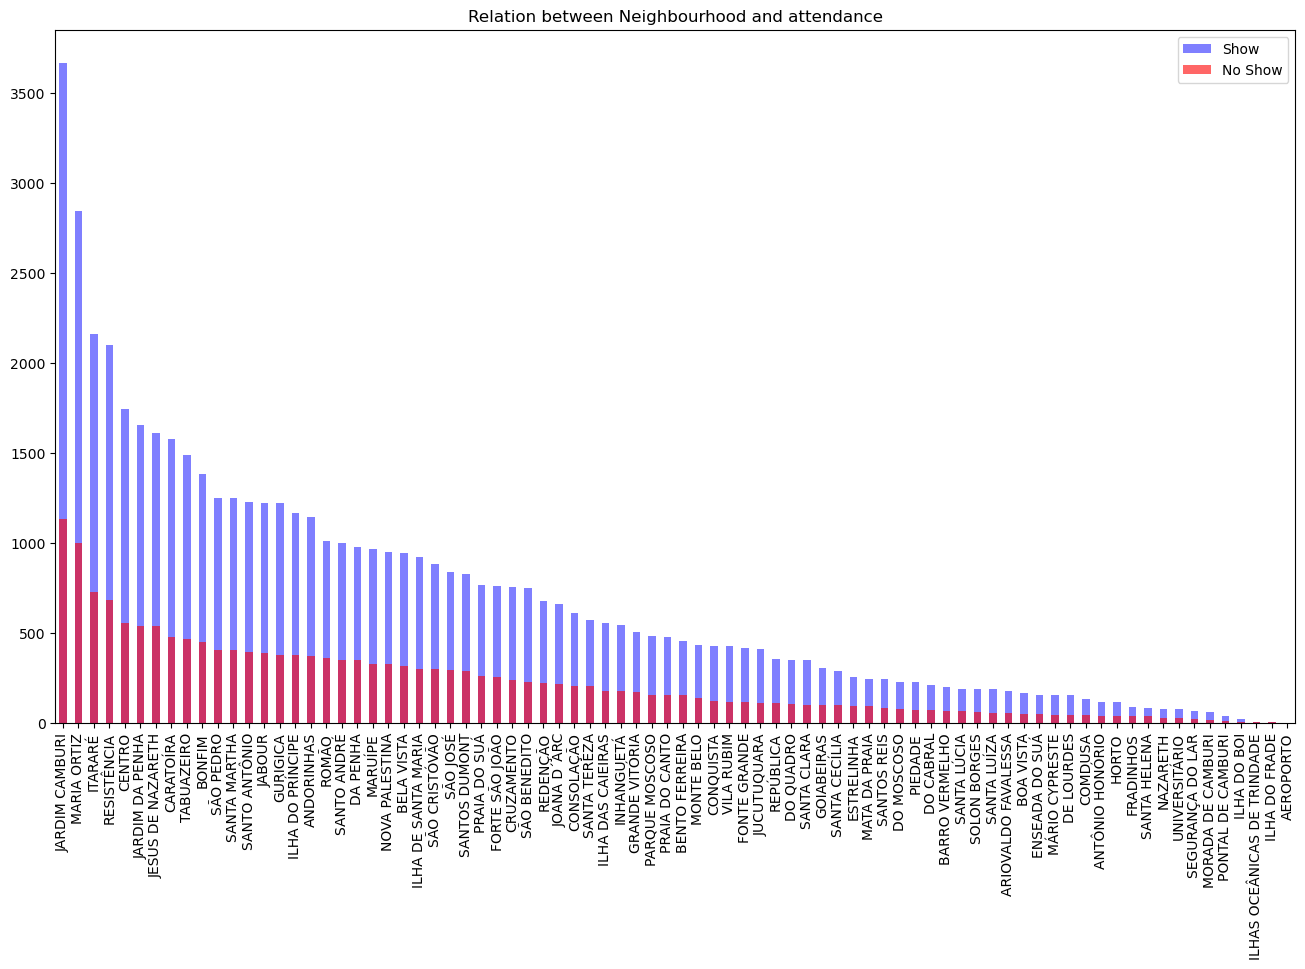

In [29]:
plt.figure(figsize=(16,9))
df['Neighbourhood'][show].value_counts().plot(kind='bar',color='blue',alpha=.5,label='Show')
df['Neighbourhood'][Noshow].value_counts().plot(kind='bar',color='red',alpha=.6,label='No Show')
plt.title('Relation between Neighbourhood and attendance')
plt.legend()
plt.show()

Neighbourhood affect the attendance or not, JARDIM CAMBURI has the greatest number of patients attendance

#### IS Relation between attendance and Neighbourhood according to receive SMS?

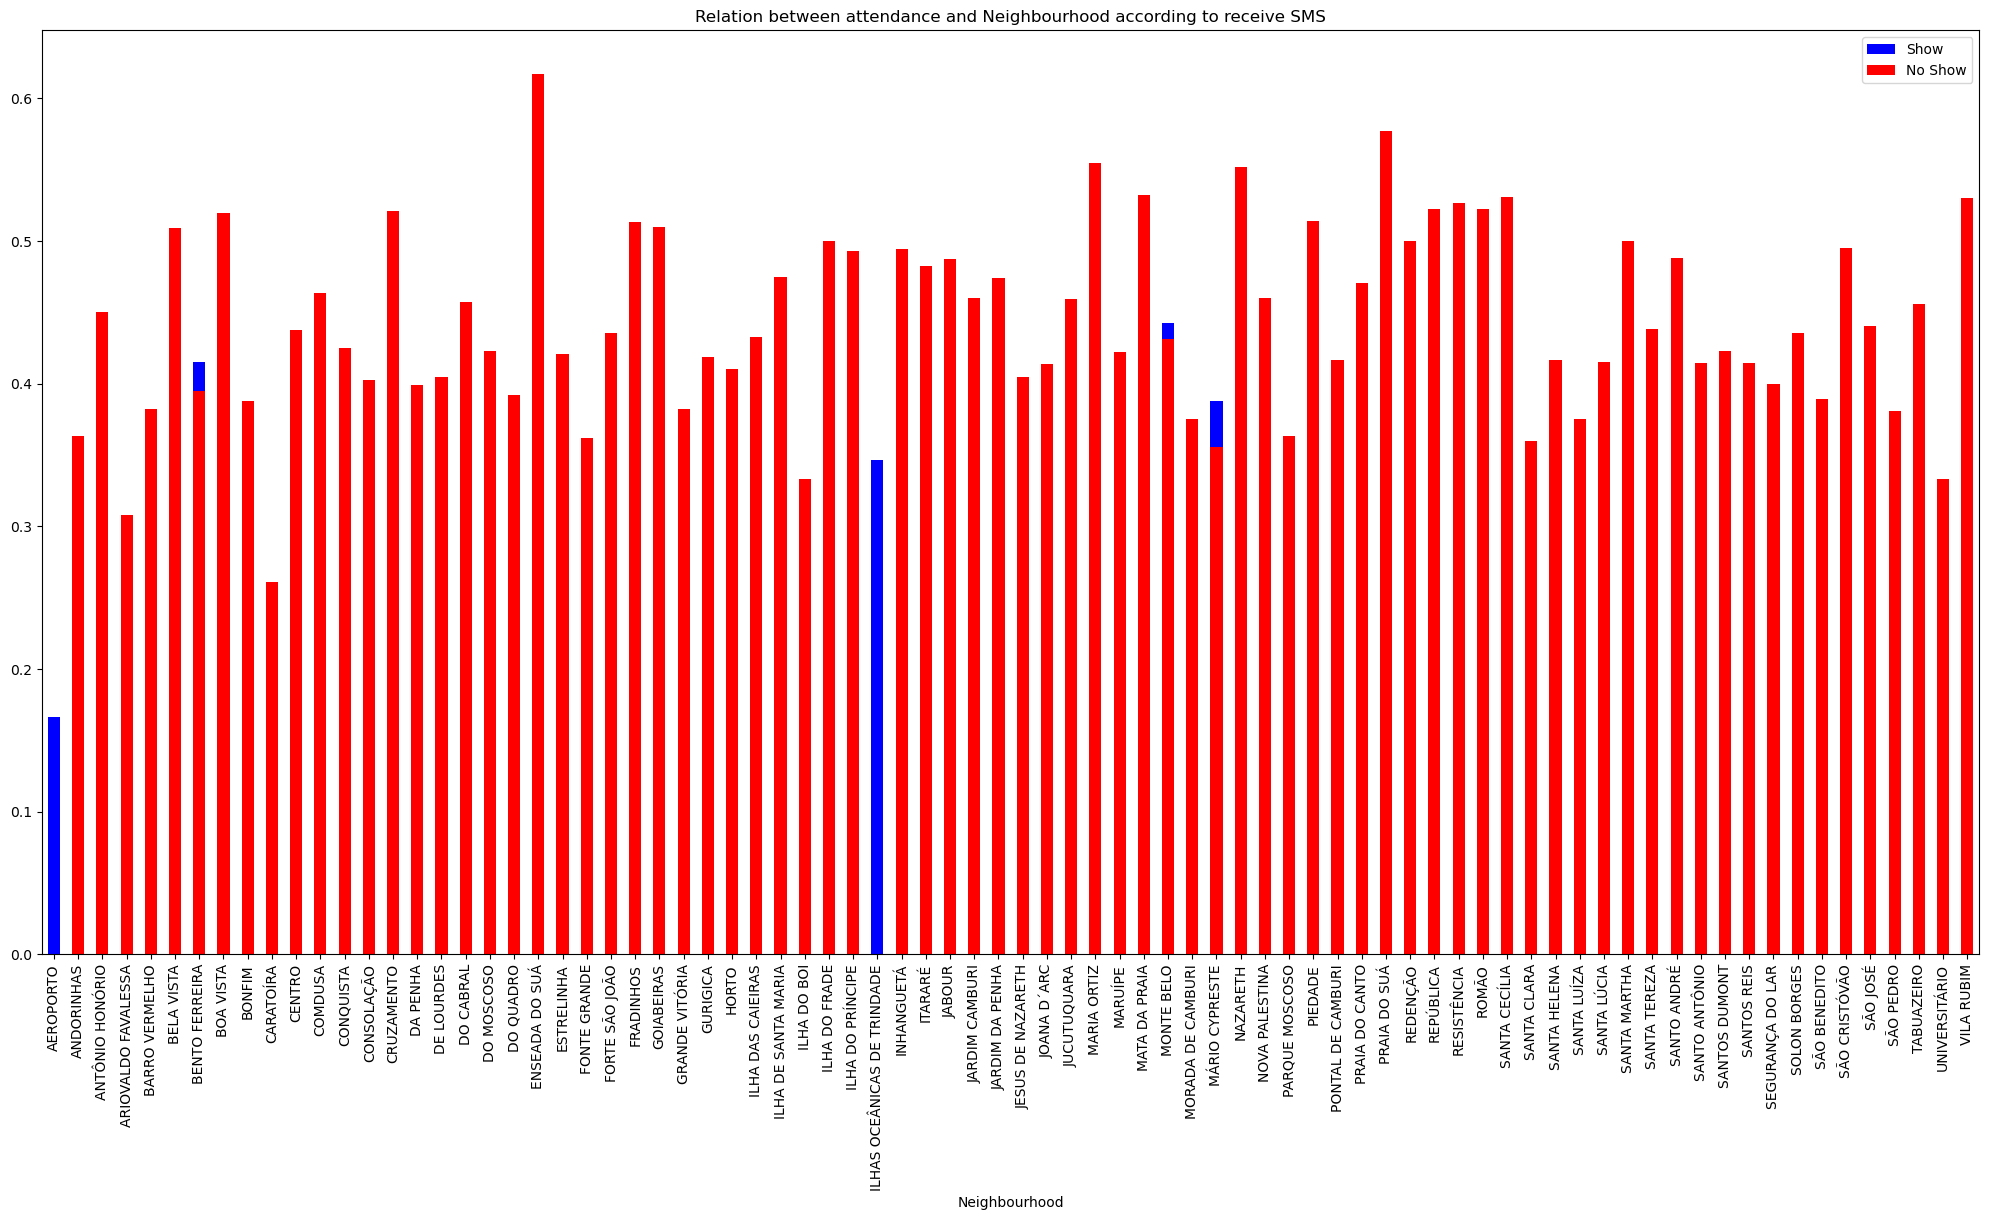

In [35]:
plt.figure(figsize=(25,12))
df[show].groupby(['Neighbourhood'])['SMS_received'].mean().plot(kind='bar',color='blue',label='Show')
df[Noshow].groupby(['Neighbourhood'])['SMS_received'].mean().plot(kind='bar',color='red',label='No Show')
plt.legend()
plt.title('Relation between attendance and Neighbourhood according to receive SMS')
plt.show()

SMS is affected in 5 Neighbourhoods

#### How age and chronic diseases are affect attendance?

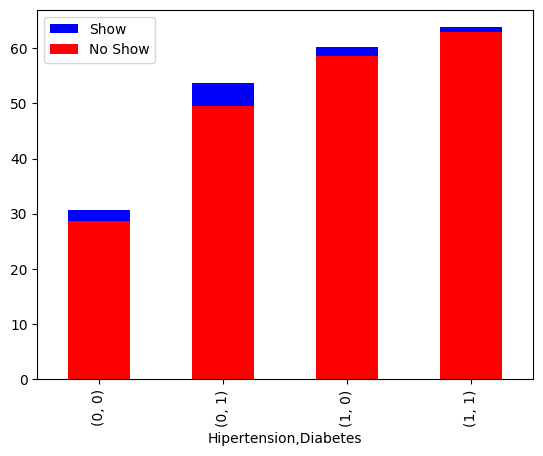

In [32]:
df[show].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind='bar',color='blue',label='Show')
df[Noshow].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind='bar',color='red',label='No Show')
plt.legend()
plt.show()

There isn't a big difference in attendance between patients who have chornic diseases and not

#### Is age and gender affect  attendance?


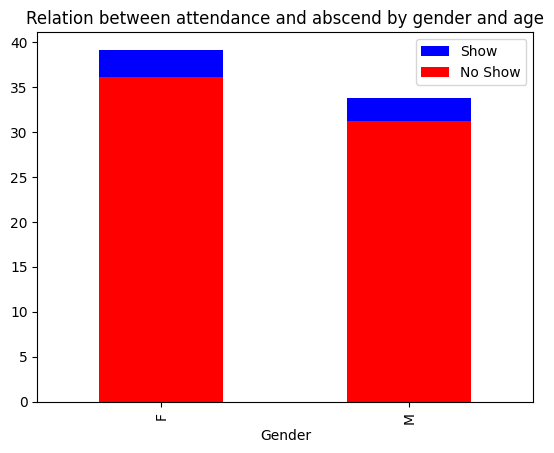

In [33]:
df[show].groupby(['Gender'])['Age'].mean().plot(kind='bar',color='blue',label='Show')
df[Noshow].groupby(['Gender'])['Age'].mean().plot(kind='bar',color='red',label='No Show')
plt.legend()
plt.title('Relation between attendance and abscend by gender and age')
plt.show()

Attendance isn't affected by the relation between age and gender

# Conclusion

1-The patients with age 0 to 10 are the most showing (kids) which means parents take care of them and the least attended are have age above 70


2-Neighbourhood has a great effect on showing patients or not, JARDIM CAMBURI has the greatest number of patients attendance

3-Number of showing patients from specific neighbourhood affected by receiving SMS and age


4-Number of showing patients without receving SMS is greater than Number of showing patients who receiving SMS


5-The Handcap is effect on attendance


6-The correlations between showing and(chornic diseases, gender, Alcoholism, Scholarship) aren't effect on Showing patients or not
